# Chapter 4 신경망 학습

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 오차제곱합
* E = $\frac{1}{2}$ $\sum_{k} (y_k - t_k)^2$

In [4]:
import numpy as np

# 오차제곱합
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

t = [0, 0 ,1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y), np.array(t)))



0.09750000000000003
0.5975


### 교차 엔트로피 오차
* E = -- $\sum_{k} t_k log y_k$

In [5]:
# 교차 엔트로피 오차
def cross_entropy_error(y, t):
    delta = 1e-7   # 무한대 방지
    return -np.sum(t * np.log(y+delta))

t = [0, 0 ,1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))




0.510825457099338
2.302584092994546


### 미니배치 학습
* 평균 손실 함수<br/>
E = -- $\frac{1}{N}\sum_{n}\sum_{k} t_{nk} log y_{nk}$

In [6]:
# 미니배치 학습
from google.colab import drive
drive.mount('/content/drive')
import sys, os
path = '/content/drive/MyDrive/DL_from_bottom'
os.chdir(path)
sys.path.append(os.chdir)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


In [7]:
# 무작위로 10장 뽑기
import numpy as np

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)  # 0~59999중에 10개 뽑아서 인덱스 번호로 쓰는듯
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

print(np.random.choice(60000, 10))

[42653 52345 40193  6335  6854 53599 37175 32547  9170 14382]


In [8]:
# 배치 활용 교차 엔트로피 오차 구현
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

# 정답 레이블이 원-핫 인코딩이 아닌 경우
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 수치 미분

미분

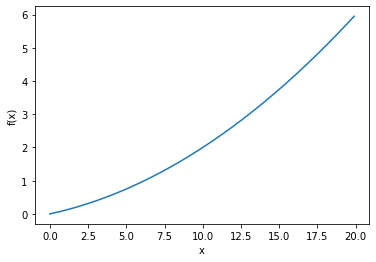

0.1999999999990898
0.2999999999986347


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x)) / h


# 반올림 오차
np.float32(1e-50)

# 문제개선
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


# 식 4.5
def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.show()

print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))


편미분

In [10]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)


def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
print(numerical_diff(function_tmp1, 3.0))

def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


기울기
* 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 함.

[6. 8.]
[0. 4.]
[6. 4.]


No handles with labels found to put in legend.


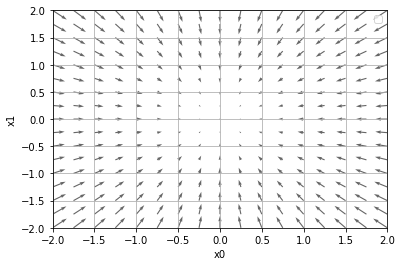

In [11]:
# gradient
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 2.0])))


# 그래프
import matplotlib.pyplot as plt


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

### 경사법

In [12]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x


# 적용
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(f"정상 : {gradient_descent(function_2, init_x, lr=0.1, step_num=100)}")

# 학습률이 클 때 : lr = 10.0
init_x = np.array([-3.0, 4.0])
print(f"클 때 : {gradient_descent(function_2, init_x, lr=10.0, step_num=100)}")

# 학습률이 작을 때 : lr = 1e-10
init_x = np.array([-3.0, 4.0])
print(f"작을 때 : {gradient_descent(function_2, init_x, lr=1e-10, step_num=100)}")


정상 : [-6.11110793e-10  8.14814391e-10]
클 때 : [-2.58983747e+13 -1.29524862e+12]
작을 때 : [-2.99999994  3.99999992]


### 신경망에서의 기울기

In [13]:
import sys, os
path = '/content/drive/MyDrive/DL_from_bottom'
os.chdir(path)

sys.path.append(os.chdir)

from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)  # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

net = simpleNet()
print(net.W) # 가중치 매개변수 <- 정규분포로 초기화된 값임

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p))

t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

# gradient
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

# lambda
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)


[[-1.7183211   1.00042644  1.03017526]
 [ 1.46520972 -0.35572438 -0.42312852]]
[0.28769609 0.28010392 0.23728949]
0
[[ 0.20385419  0.20231235 -0.40616654]
 [ 0.30578128  0.30346853 -0.60924981]]
[[ 0.20385419  0.20231235 -0.40616654]
 [ 0.30578128  0.30346853 -0.60924981]]


## 4.5 학습 알고리즘 구현하기


* 전제<br/>
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행

* 1단계 - 미니배치<br/>
훈련 데이터 중 일부를 무작위로 가져옴. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표

* 2단계 - 기울기 산출<br/>
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구합니다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시합니다.

* 3단계 - 매개변수 갱신<br/>
가중치 매개변수를 기울기 방향으로 아주 조금 갱신

* 4단계 - 반복<br/>
1~3단계를 반복한다.




In [14]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                 weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size) # 임시구현이라 0으로 하는듯
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) /float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        # 각각의 Weight와 bias에 대한 손실함수의 기울기 구하는거
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads


In [15]:
# TwoLayerNet의 인스턴트 변수
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

# 예측
x = np.random.rand(100, 784) # 데미 입력
y = net.predict(x)
print(y.shape)

# 기울기
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
# print(t)

# grads = net.numerical_gradient(x, t)

# print(grads['W1'].shape)
# print(grads['b1'].shape)
# print(grads['W2'].shape)
# print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)
(100, 10)


### 미니배치 학습 구현하기

In [19]:
from dataset.mnist import load_mnist
path = '/content/drive/MyDrive/DL_from_bottom/ch04'
os.chdir(path)

sys.path.append(os.chdir)
from two_layer_net import TwoLayerNet


(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # chap 5 에서 볼 예정

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)


<function matplotlib.pyplot.show>

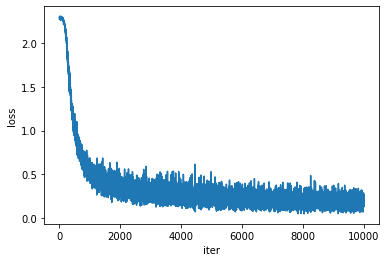

In [26]:
# 손실
x = np.arange(iters_num)
y = train_loss_list

# x.shape
# len(y)
plt.plot(x, y)
plt.xlabel('iter')
plt.ylabel('loss')
plt.show

In [27]:
# 훈련 데이터와 시험 데이터 정확도 체크

from dataset.mnist import load_mnist
path = '/content/drive/MyDrive/DL_from_bottom/ch04'
os.chdir(path)

sys.path.append(os.chdir)
from two_layer_net import TwoLayerNet

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1) # 1은 배치가 트레인보다 클때를 대비

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(f"훈련 정확도 : {train_acc}")
        print(f"테스트 정확도 : {test_acc}")


훈련 정확도 : 0.09751666666666667
테스트 정확도 : 0.0974
훈련 정확도 : 0.7953166666666667
테스트 정확도 : 0.7995
훈련 정확도 : 0.8762
테스트 정확도 : 0.8798
훈련 정확도 : 0.8979666666666667
테스트 정확도 : 0.9016
훈련 정확도 : 0.9074166666666666
테스트 정확도 : 0.9109
훈련 정확도 : 0.9147333333333333
테스트 정확도 : 0.9174
훈련 정확도 : 0.91945
테스트 정확도 : 0.9217
훈련 정확도 : 0.9232666666666667
테스트 정확도 : 0.9258
훈련 정확도 : 0.9267833333333333
테스트 정확도 : 0.9282
훈련 정확도 : 0.93055
테스트 정확도 : 0.9289
훈련 정확도 : 0.9323
테스트 정확도 : 0.9332
훈련 정확도 : 0.93595
테스트 정확도 : 0.9369
훈련 정확도 : 0.9391166666666667
테스트 정확도 : 0.9387
훈련 정확도 : 0.9407666666666666
테스트 정확도 : 0.9396
훈련 정확도 : 0.9432666666666667
테스트 정확도 : 0.9422
훈련 정확도 : 0.9454666666666667
테스트 정확도 : 0.9435
훈련 정확도 : 0.9468833333333333
테스트 정확도 : 0.9463


<function matplotlib.pyplot.show>

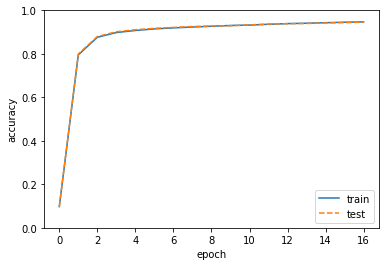

In [34]:
# 정확도 그래프

x = np.arange(len(train_acc_list))
y1 = train_acc_list
y2 = test_acc_list


plt.plot(x, y1, label='train')
plt.plot(x, y2, label='test', linestyle='--')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show